In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

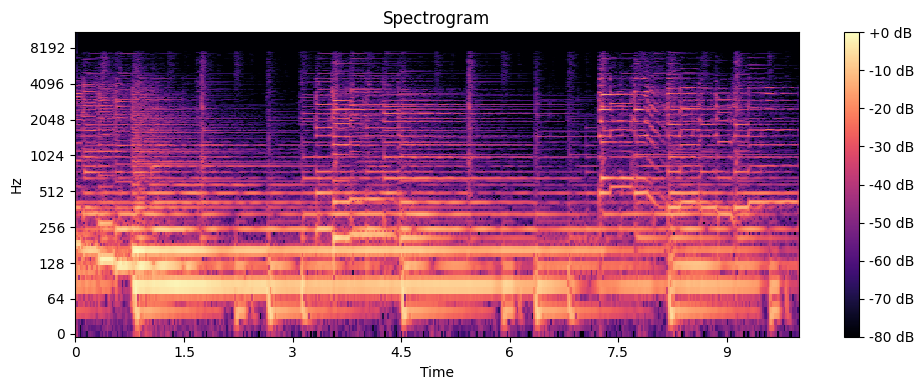

In [3]:
# Load the .wav file
filename = 'test.wav'  # replace with your .wav file
y, sr = librosa.load(filename)

# Compute the spectrogram magnitude and apply a logarithmic scale
spectrogram = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

# Display the log-spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.tight_layout()
plt.show()

In [5]:
spectrogram.shape

(1025, 431)

In [7]:
y.shape

(220500,)